<a href="https://colab.research.google.com/github/SoarAway/CharityChain/blob/main/ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# importing dataset
DATA_DIR_REAL ="/content/True.csv"
df_real = pd.read_csv(DATA_DIR_REAL, header = 0)

DATA_DIR_FAKE ="/content/Fake.csv"
df_fake = pd.read_csv(DATA_DIR_FAKE, header = 0)

In [ ]:
# Combining both files & one hot encoding
df_real['label'] = 0
df_fake['label'] = 1
df = pd.concat([df_real, df_fake], ignore_index=True)
display(df.head())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [106]:
# Dataset Information
print(df.info())
print()
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("Subjects in Real News:", df[df['label'] == 0]['subject'].unique())
print("Subjects in Fake News:", df[df['label'] == 1]['subject'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   label     44898 non-null  int64 
 5   location  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
None

Number of rows: 44898
Number of columns: 6
Subjects in Real News: ['politicsNews' 'worldnews']
Subjects in Fake News: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [112]:
import pandas as pd

# --- Assuming 'df' is your fully prepared DataFrame ---

# Ensure the columns are string type to use string methods
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

# --- Calculate word counts for the 'text' column ---
# .str.split() turns each text entry into a list of words
# .str.len() then counts the number of items in each list
text_word_counts = df['text'].str.split().str.len()

print("--- Analysis of 'text' column word count ---")
print(f"Max word count: {text_word_counts.max()} words")
print(f"Min word count: {text_word_counts.min()} words")
print(f"Average word count: {text_word_counts.mean():.2f} words")
print("\nFull description of text word counts:")
print(text_word_counts.describe())

print("\n" + "="*40 + "\n")

# --- Calculate word counts for the 'title' column ---
title_word_counts = df['title'].str.split().str.len()

print("--- Analysis of 'title' column word count ---")
print(f"Max word count: {title_word_counts.max()} words")
print(f"Min word count: {title_word_counts.min()} words")
print(f"Average word count: {title_word_counts.mean():.2f} words")
print("\nFull description of title word counts:")
print(title_word_counts.describe())

--- Analysis of 'text' column word count ---
Max word count: 4753 words
Min word count: 0 words
Average word count: 222.99 words

Full description of text word counts:
count    44898.000000
mean       222.988574
std        195.815712
min          0.000000
25%        112.000000
50%        196.000000
75%        280.000000
max       4753.000000
Name: text, dtype: float64


--- Analysis of 'title' column word count ---
Max word count: 42 words
Min word count: 1 words
Average word count: 12.45 words

Full description of title word counts:
count    44898.000000
mean        12.453472
std          4.111476
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title, dtype: float64


In [ ]:
# Add in New Column (Location)
df['location'] = df['text'].str.extract(r'^([A-Z\s/]+)(?=\s\()')
df['location'] = df['location'].fillna("N/A")
df['text'] = df['text'].str.replace(r'^[A-Z\s/]+\s\(Reuters\)\s*-\s*', '', regex=True)


print("--- Head of DataFrame (Locations Found) ---")
print(df[['text', 'location']].head())

print("\n--- Tail of DataFrame (No Location Found) ---")
print(df[['text', 'location']].tail())

--- Head of DataFrame (Locations Found) ---
                                                text            location
0  The head of a conservative Republican faction ...          WASHINGTON
1  Transgender people will be allowed for the fir...          WASHINGTON
2  The special counsel investigation of links bet...          WASHINGTON
3  Trump campaign adviser George Papadopoulos tol...          WASHINGTON
4  President Donald Trump called on the U.S. Post...  SEATTLE/WASHINGTON

--- Tail of DataFrame (No Location Found) ---
                                                    text location
44893  21st Century Wire says As 21WIRE reported earl...      N/A
44894  21st Century Wire says It s a familiar theme. ...      N/A
44895  Patrick Henningsen  21st Century WireRemember ...      N/A
44896  21st Century Wire says Al Jazeera America will...      N/A
44897  21st Century Wire says As 21WIRE predicted in ...      N/A


In [ ]:
# Pre-processing - text cleaning
import string
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import contractions

lemmatizer = WordNetLemmatizer()
stopword_list = ['one', 'two','said', 'us', 'also']

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove (Reuters)
    text = re.sub(r'\(reuters\)', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(stopword_list)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove username
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Expand contractions
    text = contractions.fix(text)
    return text

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

display(df.head())

,title,text,subject,date,label,location
0,"As U.S. budget fight looms, Republicans flip t...",head conservative republican faction congress ...,politicsNews,"December 31, 2017",0,WASHINGTON
1,U.S. military to accept transgender recruits o...,transgender people allowed first time enlist m...,politicsNews,"December 29, 2017",0,WASHINGTON
2,Senior U.S. Republican senator: 'Let Mr. Muell...,special counsel investigation links russia pre...,politicsNews,"December 31, 2017",0,WASHINGTON
3,FBI Russia probe helped by Australian diplomat...,trump campaign adviser george papadopoulos tol...,politicsNews,"December 30, 2017",0,WASHINGTON
4,Trump wants Postal Service to charge 'much mor...,president donald trump called postal service f...,politicsNews,"December 29, 2017",0,SEATTLE/WASHINGTON


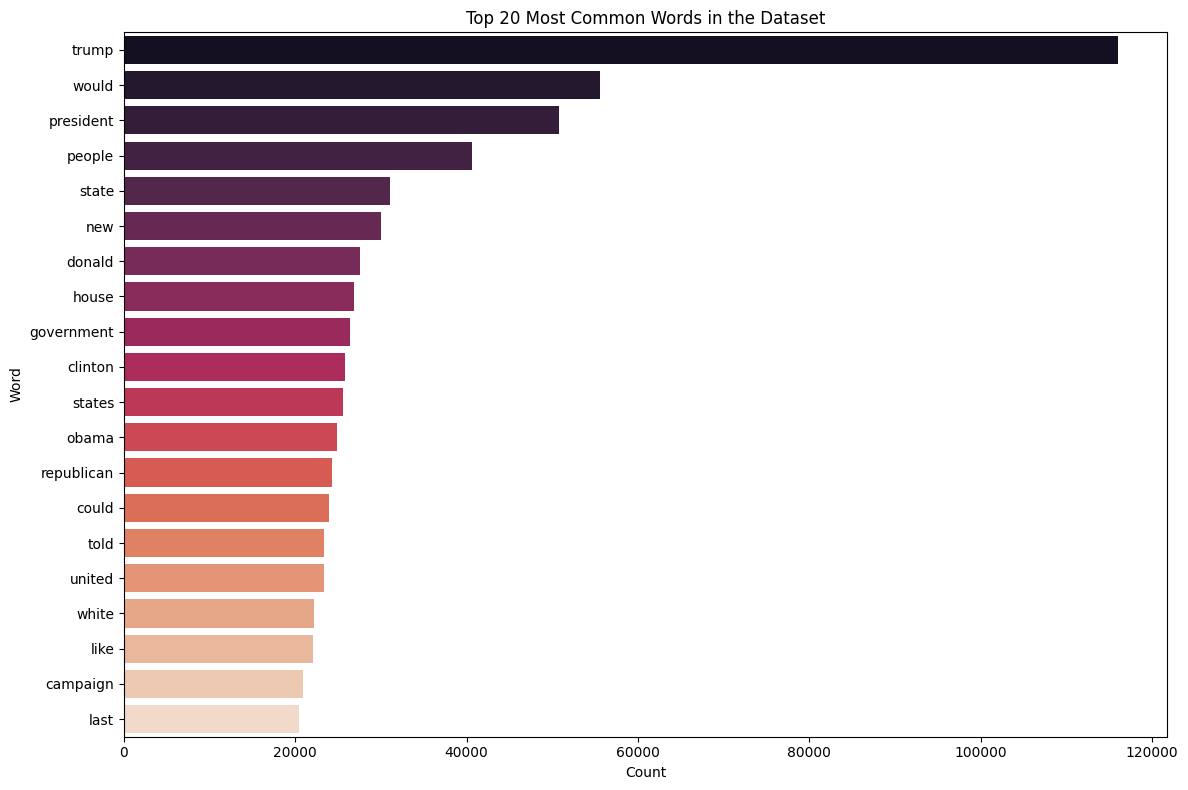

In [ ]:
all_words = [word for sentence in df['text'] for word in str(sentence).lower().split()]

word_counts = Counter(all_words)

df_top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df_top_words, palette='rocket')
plt.title('Top 20 Most Common Words in the Dataset')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [ ]:
# Pre-processing - identifying missing values
print(df.isna().sum())

# Exporting the cleaned dataset
df.to_csv("cleaned_data.csv", index=False)

title       0
text        0
subject     0
date        0
label       0
location    0
dtype: int64


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Pre-processing - Initializing variables & Splitting dataset
# Shuffling dataset
df_shuffled = shuffle(df, random_state=42)

# Initializing the dependant and independant variable
x = df_shuffled.drop('label', axis=1)
y = df_shuffled['label'].values

# Pareto Theory (80 20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# 7. Create a TF-IDF + Logistic Regression pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# 8. Train the model
pipeline.fit(x_train['text'], y_train)

# 9. Evaluate the model
y_pred = pipeline.predict(x_test['text'])

print("Classification Report (Logistics Regression):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm_logi = confusion_matrix(y_test, y_pred)
print(cm_logi)

ValueError: Found input variables with inconsistent numbers of samples: [5, 35918]

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[['text', 'title']]
y = df['label']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer(stop_words='english', max_features=5000)

# 4. Use ColumnTransformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'text'), # Apply TF-IDF to the 'text' column
        ('title', TfidfVectorizer(stop_words='english', max_features=1000), 'title'), # Apply TF-IDF to the 'title' column
    ],
    remainder='drop' # Drop any columns that are not specified
)

# 5. Create the final pipeline with the preprocessor and the model
# This chains the preprocessing and modeling steps together.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 6. Train the entire pipeline on the training data
print("Training model on 'text', 'title', and 'location' columns...")
model_pipeline.fit(X_train, y_train)

# 7. Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training model on 'text', 'title', and 'location' columns...

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4330
           1       0.99      0.98      0.98      4650

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



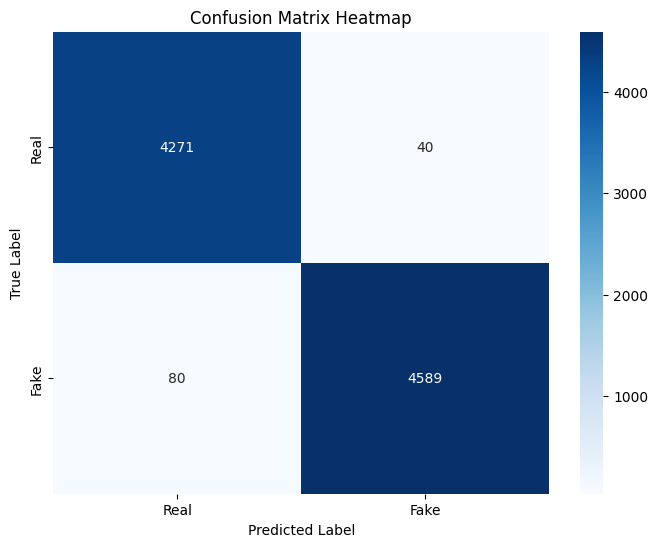

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Choosing which confusion matrix
cm = cm_logi
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Select a few examples from the test set
num_examples = 5
sample_indices = x_test.sample(num_examples, random_state=42).index

# Get the corresponding text and true labels
# Get the corresponding true labels using the index from the original dataframe
sample_true_labels = df.loc[sample_indices, 'label'].values


# Make predictions on the sample texts
sample_predictions = pipeline.predict(x_test.loc[sample_indices])

# Display the results
print("Examples from the test set and their predictions:")
for i in range(num_examples):
    print(f"\n--- Example {i+1} ---")
    print(f"Text: {sample_texts.iloc[i][:500]}...") # Displaying only the first 500 characters
    print(f"True Label: {'Fake' if sample_true_labels[i] == 1 else 'Real'}")
    print(f"Predicted Label: {'Fake' if sample_predictions[i] == 1 else 'Real'}")

Examples from the test set and their predictions:

--- Example 1 ---
Text: The recipient of the Presidential Medal of Freedom from Barack Obama in 2012 had this to say when asked about racism: And I want to see a white man convicted for raping a black woman. Then when you ask me,  Is it over? , I will say yes. Age hasn t dimmed the fire in Toni Morrison, 84. The unwavering voice of black America talks about her latest novel and what it will take for racism to be a thing of the past.Toni Morrison is, without a doubt, a world-class novelist. Her work as an editor, howeve...
True Label: Fake
Predicted Label: Fake

--- Example 2 ---
Text: Nothing shady here, huh? Unbelievable!Even by the standards of arms deals between the United States and Saudi Arabia, this one was enormous. A consortium of American defense contractors led by Boeing would deliver $29 billion worth of advanced fighter jets to the United States  oil-rich ally in the Middle East.Israeli officials were agitated, reportedly c

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

# Pre-processing (DT / RF) - Vectorization & Splitting dataset

# Initialize vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words= 'english'
)

x_train_dt = vectorizer.fit_transform(x_train)
x_test_dt = vectorizer.transform(x_test)

print("Decision Tree & Random Forest Model :")
print(f"Training set size: {x_train_dt.shape[0]}")
print(f"Testing set size: {x_test_dt.shape[0]}")


# Decision Tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',random_state =42)
dt_model.fit(x_train_dt, y_train)

y_pred_dt = dt_model.predict(x_test_dt)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)


# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_dt, y_train)

y_pred_rf = rf_model.predict(x_test_dt)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Decision Tree & Random Forest Model :
Training set size: 5
Testing set size: 5


ValueError: Number of labels=35918 does not match number of samples=5

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

# Pre-processing (DT / RF) - Vectorization & Splitting dataset

# Initialize vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words= 'english'
)

x_train_dt = vectorizer.fit_transform(x_train['text'])
x_test_dt = vectorizer.transform(x_test['text'])

print("Decision Tree & Random Forest Model :")
print(f"Training set size: {x_train_dt.shape[0]}")
print(f"Testing set size: {x_test_dt.shape[0]}")


# Decision Tree
dt_model = tree.DecisionTreeClassifier(criterion='gini',random_state =42)
dt_model.fit(x_train_dt, y_train)

y_pred_dt = dt_model.predict(x_test_dt)
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)


# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_dt, y_train)

y_pred_rf = rf_model.predict(x_test_dt)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Decision Tree & Random Forest Model :
Training set size: 35918
Testing set size: 8980
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4311
           1       0.92      0.95      0.94      4669

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Confusion Matrix:
[[3933  378]
 [ 234 4435]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4311
           1       0.98      0.98      0.98      4669

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
[[4210  101]
 [ 110 4559]]


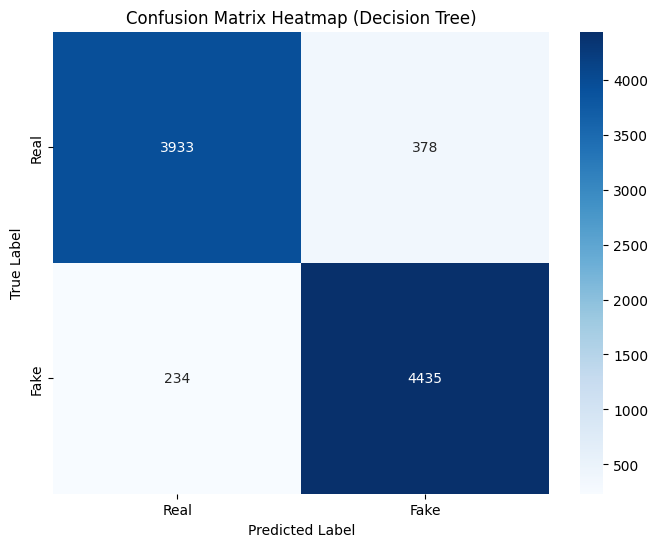

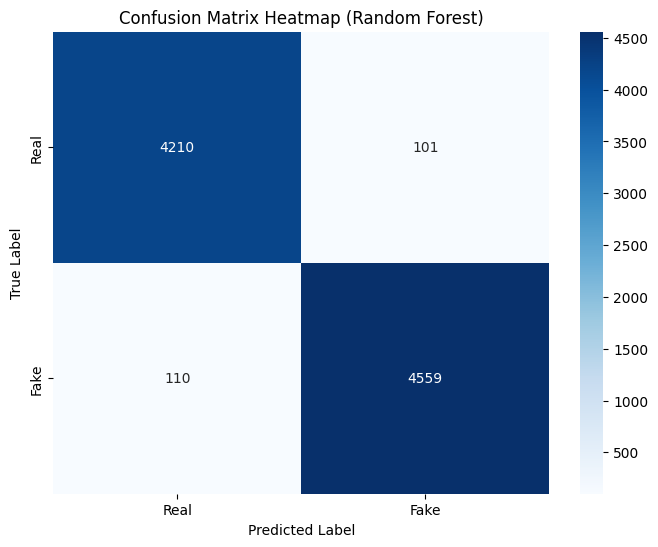

In [115]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Decision Tree)')
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Random Forest)')
plt.show()